# Project 1 Car Price Prediction from CarDekho Dataset

Problem Statement : The objective of this project is to develop a machine learning model to predict the prices of used cars based on various features using the Cardekho dataset.

## Step 1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

## Step 2 Data Gathering

In [2]:
df=pd.read_csv('car details.csv')

In [3]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

## Step 3 Exploratory Data Analysis (EDA)

In [5]:
df['Make'].value_counts()

Make
Maruti Suzuki    440
Hyundai          349
Mercedes-Benz    171
Honda            158
Toyota           132
Audi             127
BMW              121
Mahindra         119
Tata              57
Volkswagen        50
Ford              48
Renault           43
Skoda             40
Land Rover        33
Kia               23
Jeep              18
Jaguar            17
MG                17
Nissan            16
Volvo             16
Porsche           15
MINI              11
Datsun             8
Chevrolet          7
Lexus              6
Mitsubishi         4
Ssangyong          3
Rolls-Royce        3
Isuzu              2
Fiat               2
Maserati           1
Ferrari            1
Lamborghini        1
Name: count, dtype: int64

In [6]:
df['Make'].unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz',
       'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover',
       'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'Fiat', 'MINI', 'Ferrari',
       'Mitsubishi', 'Datsun', 'Lamborghini', 'Chevrolet', 'Ssangyong',
       'Rolls-Royce', 'Lexus'], dtype=object)

In [7]:
df['Make'].nunique()

33

In [8]:
df_make= pd.get_dummies(df['Make'],prefix='Make')
df_make

,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,...,Make_Nissan,Make_Porsche,Make_Renault,Make_Rolls-Royce,Make_Skoda,Make_Ssangyong,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2055,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2056,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2057,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df_make=df_make.astype(int)

In [10]:
df_make.head()

,Make_Audi,Make_BMW,Make_Chevrolet,Make_Datsun,Make_Ferrari,Make_Fiat,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,...,Make_Nissan,Make_Porsche,Make_Renault,Make_Rolls-Royce,Make_Skoda,Make_Ssangyong,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df['Make'].unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz',
       'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover',
       'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'Fiat', 'MINI', 'Ferrari',
       'Mitsubishi', 'Datsun', 'Lamborghini', 'Chevrolet', 'Ssangyong',
       'Rolls-Royce', 'Lexus'], dtype=object)

### want ot find out which type of encoding should we use

In [12]:
df['Model'].value_counts()

Model
X1 sDrive20d xLine                 15
Swift DZire VDI                    14
City V                             13
Fortuner 2.8 4x2 AT [2016-2020]    13
Swift DZire VXI                    12
                                   ..
XF R 5.0 V8 Supercharged            1
Pajero SFX 2.8                      1
Etios G                             1
Marazzo M6 Plus 8 STR               1
Figo Duratec Petrol ZXI 1.2         1
Name: count, Length: 1050, dtype: int64

In [13]:
df['Model'].unique()

array(['Amaze 1.2 VX i-VTEC', 'Swift DZire VDI', 'i10 Magna 1.2 Kappa2',
       ..., 'Ritz Vxi (ABS) BS-IV', 'XUV500 W8 [2015-2017]',
       'Figo Duratec Petrol ZXI 1.2'], dtype=object)

In [14]:
df['Model'].nunique()

1050

In [17]:
df['Model']=label_encoder.fit_transform(df['Model'])
df['Model']

0        106
1        802
2       1030
3        492
4        548
        ... 
2054     999
2055     414
2056     455
2057      13
2058     138
Name: Model, Length: 2059, dtype: int64

In [18]:
df['Model'].isna().sum()

0

In [20]:
df['Price'].value_counts()

Price
425000     26
625000     24
650000     22
450000     20
375000     20
           ..
1698999     1
3995000     1
9200000     1
426999      1
670000      1
Name: count, Length: 619, dtype: int64

In [21]:
df['Price'].isna().sum()

0

In [23]:
df['Year'].value_counts()

Year
2018    268
2017    262
2019    218
2014    192
2016    187
2015    178
2021    156
2020    132
2013    128
2012     92
2022     81
2011     79
2009     33
2010     27
2008     13
2007      6
2006      2
2004      1
2002      1
1988      1
2000      1
1996      1
Name: count, dtype: int64

In [24]:
df['Year'].unique()

array([2017, 2014, 2011, 2019, 2018, 2015, 2016, 2020, 2013, 2009, 2010,
       2021, 2012, 2006, 2022, 2007, 2008, 2004, 2002, 1988, 2000, 1996],
      dtype=int64)

In [25]:
df['Year'].nunique()

22

<Axes: xlabel='Year'>

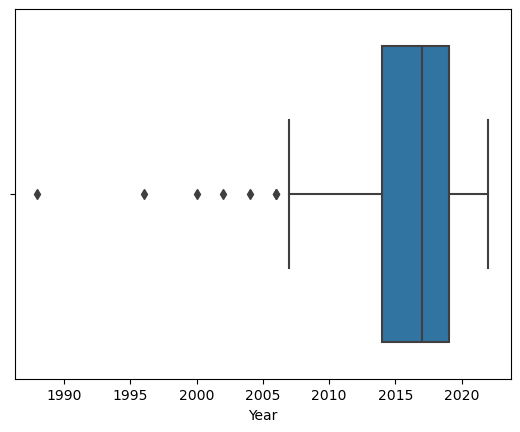

In [26]:
sns.boxplot(data=df, x='Year')

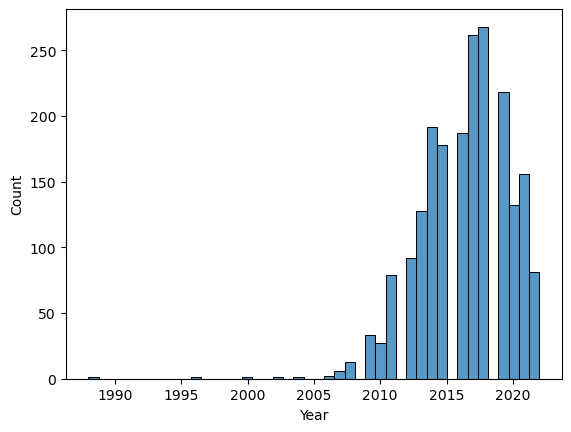

In [27]:
sns.histplot(data=df, x='Year');

- Most of the cars manufactured in the year 2016 to 2018

In [28]:
df['Kilometer'].value_counts()

Kilometer
65000    33
72000    32
75000    29
45000    29
50000    29
         ..
72600     1
42313     1
26200     1
14366     1
60474     1
Name: count, Length: 847, dtype: int64

In [29]:
df['Kilometer'].isna().sum()

0

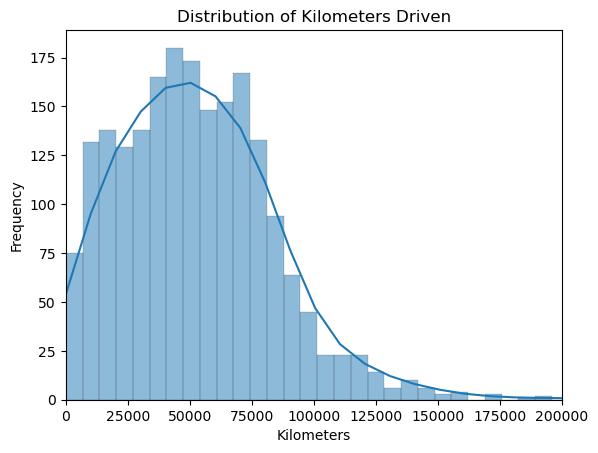

In [30]:
sns.histplot(df['Kilometer'], kde=True)

# Set the x-axis limits
plt.xlim(0, 200000)  # Change these values based on your data range

# Add titles and labels
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   int64  
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [32]:
df['Fuel Type'].value_counts()

Fuel Type
Diesel          1049
Petrol           942
CNG               50
Electric           7
LPG                5
Hybrid             3
CNG + CNG          1
Petrol + CNG       1
Petrol + LPG       1
Name: count, dtype: int64

In [33]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric', 'CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [34]:
df['Fuel Type'].nunique()

9

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [36]:
df['Fuel Type'] = label_encoder.fit_transform(df['Fuel Type'])

In [37]:
df['Fuel Type'].unique()       # To check whether the column names changes or not

array([6, 2, 0, 5, 3, 1, 4, 7, 8])

In [125]:
df['Transmission'].value_counts()

Transmission
Manual       1133
Automatic     926
Name: count, dtype: int64

In [126]:
df['Transmission'].replace({'Manual':0,'Automatic':1},inplace=True)

In [128]:
df['Transmission'].unique()

array([0, 1], dtype=int64)

In [131]:
df['Transmission']

0       0
1       0
2       0
3       0
4       0
       ..
2054    0
2055    0
2056    0
2057    1
2058    0
Name: Transmission, Length: 2059, dtype: int64

In [41]:
df['Location'].value_counts()

Location
Mumbai              342
Delhi               307
Pune                144
Bangalore           132
Hyderabad           116
                   ... 
Faizabad              1
Pimpri-Chinchwad      1
Rohtak                1
Valsad                1
Siliguri              1
Name: count, Length: 77, dtype: int64

In [42]:
df['Location'].isna().sum()

0

In [43]:
df_location=pd.get_dummies(df['Location'],prefix='loaction')
df_location

,loaction_Agra,loaction_Ahmedabad,loaction_Allahabad,loaction_Ambala Cantt,loaction_Amritsar,loaction_Aurangabad,loaction_Bangalore,loaction_Bhopal,loaction_Bhubaneswar,loaction_Bulandshahar,...,loaction_Surat,loaction_Thane,loaction_Udupi,loaction_Unnao,loaction_Vadodara,loaction_Valsad,loaction_Varanasi,loaction_Warangal,loaction_Yamunanagar,loaction_Zirakpur
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2055,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2056,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2057,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df_location =df_location.astype(int)

In [45]:
df_location

,loaction_Agra,loaction_Ahmedabad,loaction_Allahabad,loaction_Ambala Cantt,loaction_Amritsar,loaction_Aurangabad,loaction_Bangalore,loaction_Bhopal,loaction_Bhubaneswar,loaction_Bulandshahar,...,loaction_Surat,loaction_Thane,loaction_Udupi,loaction_Unnao,loaction_Vadodara,loaction_Valsad,loaction_Varanasi,loaction_Warangal,loaction_Yamunanagar,loaction_Zirakpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2055,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2056,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### want out find out which type of encoding should we use

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   int64  
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int32  
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [47]:
df['Color'].value_counts()

Color
White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Green      17
Orange     16
Others     12
Yellow      9
Beige       8
Purple      5
Pink        1
Name: count, dtype: int64

In [48]:
df['Color'].unique()

array(['Grey', 'White', 'Maroon', 'Red', 'Blue', 'Orange', 'Silver',
       'Brown', 'Black', 'Bronze', 'Gold', 'Beige', 'Green', 'Yellow',
       'Purple', 'Others', 'Pink'], dtype=object)

In [49]:
df['Color'].isna().sum()

0

In [50]:
df['Color'] = label_encoder.fit_transform(df['Color'])

In [51]:
df['Color'].unique()

array([ 7, 15,  8, 13,  2,  9, 14,  4,  1,  3,  5,  0,  6, 16, 12, 10, 11])

In [57]:
df['Owner'].value_counts()

Owner
1    1619
2     373
3      42
5      21
4       3
6       1
Name: count, dtype: int64

In [58]:
df['Owner'].isna().sum()

0

In [59]:
df['Owner'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [60]:
df['Owner'].replace({'First':1, 'Second':2, 'Third':3, 'Fourth':4, 'UnRegistered Car':5,
       '4 or More':6},inplace=True)

In [61]:
df['Owner'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   int64  
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int32  
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   int32  
 9   Owner               2059 non-null   int64  
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [63]:
df['Seller Type'].value_counts()

Seller Type
Individual                 1997
Corporate                    57
Commercial Registration       5
Name: count, dtype: int64

In [64]:
df['Seller Type'].isna().sum()

0

In [65]:
df['Seller Type'].unique()

array(['Corporate', 'Individual', 'Commercial Registration'], dtype=object)

In [66]:
df['Seller Type'].replace({'Corporate':1, 'Individual':2, 'Commercial Registration':3},inplace=True)

In [67]:
df['Seller Type'].unique()

array([1, 2, 3], dtype=int64)

In [69]:
df['Engine'].value_counts()

Engine
1197 cc    231
1248 cc    122
998 cc     121
1497 cc     84
1968 cc     82
          ... 
1948 cc      1
4806 cc      1
3496 cc      1
2609 cc      1
995 cc       1
Name: count, Length: 108, dtype: int64

In [70]:
df['Engine'].isna().sum()

80

In [71]:
df['Engine'].unique()

array(['1198 cc', '1248 cc', '1197 cc', '2393 cc', '1373 cc', '1991 cc',
       '1995 cc', '1798 cc', '1461 cc', '999 cc', '1462 cc', '1956 cc',
       '998 cc', '796 cc', '1591 cc', '1086 cc', '1199 cc', '1582 cc',
       nan, '1047 cc', '2143 cc', '1968 cc', '1796 cc', '2498 cc',
       '2494 cc', '2179 cc', '1998 cc', '1497 cc', '1196 cc', '2755 cc',
       '1799 cc', '1493 cc', '1399 cc', '1498 cc', '1997 cc', '1598 cc',
       '2993 cc', '2995 cc', '2982 cc', '1353 cc', '1984 cc', '2967 cc',
       '2609 cc', '1950 cc', '1999 cc', '4663 cc', '1451 cc', '2354 cc',
       '1396 cc', '2987 cc', '2997 cc', '1336 cc', '4163 cc', '3496 cc',
       '799 cc', '2979 cc', '4806 cc', '2996 cc', '1061 cc', '2184 cc',
       '2497 cc', '2999 cc', '1948 cc', '3436 cc', '2925 cc', '2489 cc',
       '1368 cc', '1797 cc', '1298 cc', '2694 cc', '1186 cc', '1364 cc',
       '3498 cc', '3982 cc', '1120 cc', '2523 cc', '1988 cc', '3902 cc',
       '624 cc', '2477 cc', '3198 cc', '5204 cc', '814 cc', '

In [72]:
df['Engine']=df['Engine'].str.replace(" cc","")

In [73]:
df['Engine'].fillna(df['Engine'].mode()[0],inplace=True)

In [74]:
df['Engine']=df['Engine'].astype(float)

In [75]:
df['Engine'].isna().sum()

0

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   int64  
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int32  
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   int32  
 9   Owner               2059 non-null   int64  
 10  Seller Type         2059 non-null   int64  
 11  Engine              2059 non-null   float64
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [77]:
df['Max Power'].value_counts()

Max Power
89 bhp @ 4000 rpm     90
82 bhp @ 6000 rpm     62
83 bhp @ 6000 rpm     55
126 bhp @ 4000 rpm    55
74 bhp @ 4000 rpm     50
                      ..
204 bhp @ 3800 rpm     1
157 bhp @ 6500 rpm     1
255 bhp @ 3600 rpm     1
76 bhp @ 6000 rpm      1
329 bhp @ 5250 rpm     1
Name: count, Length: 335, dtype: int64

In [78]:
df['Max Power'].isna().sum()

80

In [79]:
df['Max Torque'].value_counts()

Max Torque
200 Nm @ 1750 rpm    90
115 Nm @ 4000 rpm    78
114 Nm @ 4000 rpm    66
90 Nm @ 3500 rpm     64
400 Nm @ 1750 rpm    63
                     ..
505 Nm @ 4400 rpm     1
290@1800              1
380 Nm @ 2500 rpm     1
560 Nm @ 6500 rpm     1
480 Nm @ 1600 rpm     1
Name: count, Length: 290, dtype: int64

In [80]:
df['Max Torque'].isna().sum()

80

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   int64  
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int32  
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   int32  
 9   Owner               2059 non-null   int64  
 10  Seller Type         2059 non-null   int64  
 11  Engine              2059 non-null   float64
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [82]:
df['Drivetrain'].value_counts()

Drivetrain
FWD    1330
RWD     321
AWD     272
Name: count, dtype: int64

In [83]:
df['Drivetrain'].isna().sum()

136

In [84]:
df['Drivetrain'].replace({"FWD":1 ,"RWD":2 ,"AWD":3},inplace=True)

In [85]:
df['Drivetrain'].unique()

array([ 1.,  2.,  3., nan])

In [86]:
df['Drivetrain'].fillna(df['Drivetrain'].mode()[0],inplace=True)

In [87]:
df['Drivetrain'].unique()

array([1., 2., 3.])

In [88]:
df['Drivetrain'].value_counts()

Drivetrain
1.0    1466
2.0     321
3.0     272
Name: count, dtype: int64

In [89]:
df['Drivetrain'].isna().sum()

0

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   int64  
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int32  
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   int32  
 9   Owner               2059 non-null   int64  
 10  Seller Type         2059 non-null   int64  
 11  Engine              2059 non-null   float64
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          2059 non-null   float64
 15  Length              1995 non-null   float64
 16  Width 

In [91]:
df['Length'].value_counts()

Length
3995.0    221
4440.0     70
4270.0     57
3985.0     55
4456.0     44
         ... 
4371.0      1
5399.0      1
4969.0      1
3884.0      1
4249.0      1
Name: count, Length: 248, dtype: int64

In [92]:
df['Length'].isna().sum()

64

In [93]:
df['Length'].fillna(df['Length'].median(),inplace=True)

In [94]:
df['Length'].isna().sum()

0

In [95]:
df['Width'].value_counts()

Width
1695.0    201
1780.0     62
1790.0     61
1680.0     51
1660.0     51
         ... 
1758.0      1
1687.0      1
2139.0      1
1915.0      1
2032.0      1
Name: count, Length: 170, dtype: int64

In [96]:
df['Width'].isna().sum()

64

In [97]:
df['Width'].fillna(df['Width'].median(),inplace=True)

In [98]:
df['Width'].isna().sum()

0

In [99]:
df['Height'].value_counts()

Height
1475.0    88
1505.0    80
1530.0    63
1520.0    61
1495.0    58
          ..
1538.0     1
1658.0     1
1572.0     1
1710.0     1
1503.0     1
Name: count, Length: 196, dtype: int64

In [100]:
df['Height'].isna().sum()

64

In [101]:
df['Height'].fillna(df['Height'].median(),inplace=True)

In [102]:
df['Height'].isna().sum()

0

In [103]:
df['Seating Capacity'].value_counts()

Seating Capacity
5.0    1615
7.0     273
4.0      42
8.0      35
6.0      23
2.0       7
Name: count, dtype: int64

In [104]:
df['Seating Capacity'].isna().sum()

64

In [105]:
df['Seating Capacity'].fillna(df['Seating Capacity'].median(),inplace=True)

In [106]:
df['Seating Capacity'].isna().sum()

0

In [107]:
df['Fuel Tank Capacity'].value_counts()

Fuel Tank Capacity
35.0     222
60.0     155
45.0     154
43.0     146
50.0     132
55.0     117
42.0     111
40.0     106
80.0      92
37.0      89
66.0      59
70.0      59
65.0      55
48.0      51
57.0      44
64.0      31
28.0      30
63.0      30
75.0      30
32.0      27
52.0      20
44.0      20
93.0      18
100.0     15
54.0      14
67.0      12
56.0      11
90.0      10
78.0       7
51.0       6
83.0       6
41.0       6
27.0       5
77.0       5
85.0       5
62.0       5
71.0       5
82.0       4
105.0      3
82.5       3
58.0       3
47.0       3
68.0       3
59.0       3
95.0       2
73.0       2
60.9       2
15.0       1
66.5       1
104.0      1
92.0       1
67.5       1
81.0       1
61.0       1
38.0       1
Name: count, dtype: int64

In [108]:
df['Fuel Tank Capacity'].isna().sum()

113

In [109]:
df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].median(),inplace=True)

In [110]:
df['Fuel Tank Capacity'].isna().sum()

0

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   int64  
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   int32  
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   int32  
 9   Owner               2059 non-null   int64  
 10  Seller Type         2059 non-null   int64  
 11  Engine              2059 non-null   float64
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          2059 non-null   float64
 15  Length              2059 non-null   float64
 16  Width 

In [112]:
columns = ['Length','Width','Height','Fuel Tank Capacity','Max Power','Max Torque','Make','Location']
print(columns)

['Length', 'Width', 'Height', 'Fuel Tank Capacity', 'Max Power', 'Max Torque', 'Make', 'Location']


In [139]:
df.drop(columns,axis=1,inplace=True)

In [ ]:
df=pd.concat([df,df_location,df_make],axis=1)

In [1]:
df.info()

NameError: name 'df' is not defined

In [132]:
df

,Model,Price,Year,Kilometer,Fuel Type,Transmission,Color,Owner,Seller Type,Engine,...,Make_Nissan,Make_Porsche,Make_Renault,Make_Rolls-Royce,Make_Skoda,Make_Ssangyong,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,106,505000,2017,87150,6,0,7,1,1,1198.0,...,0,0,0,0,0,0,0,0,0,0
1,802,450000,2014,75000,2,0,15,2,2,1248.0,...,0,0,0,0,0,0,0,0,0,0
2,1030,220000,2011,67000,6,0,8,1,2,1197.0,...,0,0,0,0,0,0,0,0,0,0
3,492,799000,2019,37500,6,0,13,1,2,1197.0,...,0,0,0,0,0,0,0,1,0,0
4,548,1950000,2018,69000,2,0,7,1,2,2393.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,999,850000,2016,90300,2,0,15,1,2,2179.0,...,0,0,0,0,0,0,0,0,0,0
2055,414,275000,2014,83000,6,0,15,2,2,814.0,...,0,0,0,0,0,0,0,0,0,0
2056,455,240000,2013,73000,6,0,14,1,2,1196.0,...,0,0,0,0,0,0,0,0,0,0
2057,13,4290000,2018,60474,2,1,15,1,2,1995.0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df.isna().sum().value_counts()

0    122
Name: count, dtype: int64

# Step 4 Model Training

## 1) Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
x = df.drop('Price',axis=1)# independet variable  = price
y = df['Price']  # dependent variable

In [136]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)


### Create an instance

In [137]:
model = LinearRegression()

In [138]:
model.fit(x_train,y_train)

LinearRegression()

In [140]:
model.coef_

array([ 3.86152463e+02,  1.93259498e+05, -3.69342996e+00,  2.60131578e+04,
        8.64416549e+03,  3.42519567e+01,  1.29928225e+05,  4.90436193e+04,
        8.75428755e+02,  3.23497449e+05,  3.28943903e+04, -2.41129022e+05,
       -6.75379854e+04,  2.26650338e+05,  1.07041843e+05,  1.90155725e+04,
       -2.94678828e+05,  1.03414090e+05,  1.54479503e+05, -2.34030464e+05,
       -3.50198736e+04, -1.86029350e+05,  2.23052225e+05,  1.37049906e+05,
        3.42488493e+04,  1.82411485e+05,  9.86293843e+04,  2.89878532e+05,
        1.22117315e+05,  6.23755494e+05,  5.36528552e+05, -5.24710240e+04,
        4.11771796e+05,  5.45195404e+05, -1.24366369e+06, -8.20636174e+04,
       -2.33573955e+05, -1.66352729e+05,  1.86201121e+05,  2.66714111e+05,
       -7.52088584e+04, -2.99573087e+05,  3.64844672e+05,  6.52155249e+04,
       -9.41262033e+03, -2.53773866e+05,  1.07102096e-08, -3.12007518e+05,
       -3.80316155e+05,  2.57699450e+05,  4.03594391e+04, -2.02731230e+05,
       -2.39714737e+05,  

In [141]:
model.intercept_

-388821243.9849189

## Testing Data Evalution

In [124]:
y_pred = model.predict(x_test)

mse= mean_squared_error(y_test, y_pred )
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(y_test,y_pred )
print('R2:',r2)

mae= mean_absolute_error(y_test, y_pred )
print('MAE:', mae)

MSE: 3012468735600.5874
RMSE: 1735646.489236961
R2: 0.6383093472587225
MAE: 760319.061025287


## Training data Evaluation

In [125]:
y_pred_train = model.predict(x_train)

mse= mean_squared_error(y_train, y_pred_train )
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

r2 = r2_score(y_train,y_pred_train )
print('R2:',r2)

mae= mean_absolute_error(y_train, y_pred_train )
print('MAE:', mae)

MSE: 1291620107976.2034
RMSE: 1136494.6581379974
R2: 0.7530385490340851
MAE: 621350.5133678014


In [126]:
y_test[:10]

1178    10800000
1707      595000
920       198000
111      2250000
1011      695000
1100      425000
1975      521000
1219     2250000
1068     1750000
846       750000
Name: Price, dtype: int64

In [127]:
y_pred[:10]

array([5464984.09591275,  319396.61550957,   23297.64546585,
       3753935.91780752, 1022776.75358653, 1752806.58098376,
        706491.74575955, 2738225.57939339, 1610552.25718874,
       3675810.29048002])

In [128]:
residual = y_train - y_pred_train
residual

563    -1.040519e+06
17     -1.086877e+05
248     7.385643e+05
1740    1.772812e+05
1413   -3.255699e+05
            ...     
960    -1.091868e+06
905    -2.008521e+05
1096   -6.747185e+05
235    -6.133990e+06
1061    4.423889e+05
Name: Price, Length: 1647, dtype: float64

In [129]:
import scipy.stats as sts
import statsmodels.api as sm

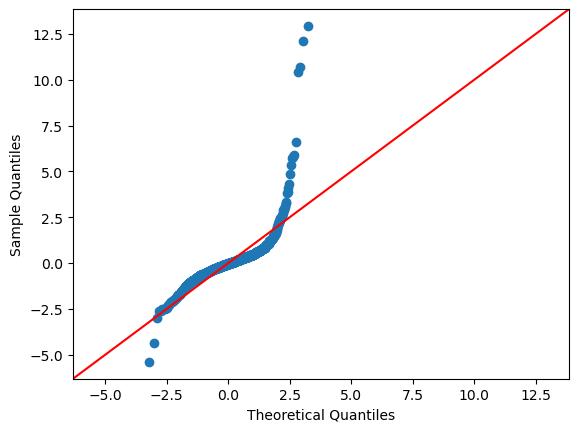

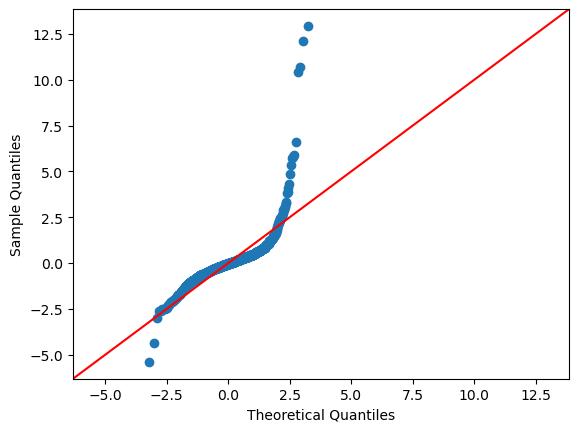

In [130]:
sm.qqplot(residual, line ='45',fit= True)

# 2) K-Nearest Neighbour Algorithm

## Normalization

In [131]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [132]:
Norm = MinMaxScaler()
Norm_array = Norm.fit_transform(x)
Norm_df = pd.DataFrame(Norm_array, columns=x.columns)
Norm_df

,Model,Year,Kilometer,Fuel Type,Transmission,Color,Owner,Seller Type,Engine,Drivetrain,...,Make_Nissan,Make_Porsche,Make_Renault,Make_Rolls-Royce,Make_Skoda,Make_Ssangyong,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,0.101049,0.852941,0.043575,0.75,0.0,0.4375,0.0,0.0,0.096180,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.764538,0.764706,0.037500,0.25,0.0,0.9375,0.2,0.5,0.104558,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.981888,0.676471,0.033500,0.75,0.0,0.5000,0.0,0.5,0.096012,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.469018,0.911765,0.018750,0.75,0.0,0.8125,0.0,0.5,0.096012,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.522402,0.882353,0.034500,0.25,0.0,0.4375,0.0,0.5,0.296414,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.952336,0.823529,0.045150,0.25,0.0,0.9375,0.0,0.5,0.260556,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,0.394662,0.764706,0.041500,0.75,0.0,0.9375,0.2,0.5,0.031836,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2056,0.433746,0.735294,0.036500,0.75,0.0,0.8750,0.0,0.5,0.095845,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2057,0.012393,0.882353,0.030237,0.25,1.0,0.9375,0.0,0.5,0.229725,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Training

In [133]:
knn_model= KNeighborsRegressor()
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

## Testing data Evaluation

In [134]:
y_pred = knn_model.predict(x_test)

In [135]:
mse = mean_squared_error(y_test,y_pred)
print('MSE :', mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

r2 = r2_score(y_test,y_pred)
print('r2_score :', r2)

MSE : 4852398207784.133
RMSE : 2202815.9722918603
r2_score : 0.4173990739246142


## Training data Evaluation

In [136]:
y_pred = knn_model.predict(x_train)

In [137]:
mse = mean_squared_error(y_train,y_pred)
print('MSE :', mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

r2 = r2_score(y_train,y_pred)
print('r2_score :', r2)

MSE : 2052875401093.5652
RMSE : 1432785.888084317
r2_score : 0.6074843643455867


## Hyper Parameter tuning

In [138]:
knn_model = KNeighborsRegressor()
hyp = {'n_neighbors':np.arange(3,50),
      'p':[1,2]}

gscv_knn = GridSearchCV(knn_model, hyp, cv=5)
gscv_knn.fit(x_train, y_train)
gscv_knn.best_estimator_

KNeighborsRegressor(n_neighbors=4, p=1)

In [139]:
gscv_knn.best_params_

{'n_neighbors': 4, 'p': 1}

## Testing Data Evaluation

In [140]:
y_pred = gscv_knn.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('MSE :', mse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE :',mae)

r2_value = r2_score(y_test, y_pred)
print('R2 Score :', r2_value)

MSE : 5255547256743.687
MAE : 995175.9805825243
R2 Score : 0.3689951715215788


## Training Data Evaluation

In [141]:
y_pred_train = gscv_knn.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print('MSE :', mse)

mae = mean_absolute_error(y_train, y_pred_train)
print('MAE :',mae)

r2_value = r2_score(y_train, y_pred_train)
print('R2 Score :', r2_value)

MSE : 1906391327374.1238
MAE : 677695.6666666666
R2 Score : 0.6354925373104952


In [142]:
adj_r2 = 1- ((1-r2)*(len(x_test)-1)/ (len(x_test) - len(x.columns)-1))
print('Adjusted r_squared:',adj_r2)

Adjusted r_squared: 0.4437105991242626


# 3) Desicion Tree

In [143]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import GridSearchCV

## Model Training

In [144]:
dt_model = DecisionTreeRegressor(criterion='squared_error')
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

## Testing data evaluation

In [145]:
y_pred = dt_model.predict(x_test)

mse= mean_squared_error(y_test,y_pred)
print('Mean Squared Error :', mse)

rmse= np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae= mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error', mae)

r2 = r2_score(y_test,y_pred)
print('R-squared value', r2)

Mean Squared Error : 2411103039883.5776
Root Mean Squared Error : 1552772.6942098052
Mean Absolute Error 514786.4077669903
R-squared value 0.7105120388417552


## Training data evaluation

In [146]:
y_pred_train = dt_model.predict(x_train)

mse= mean_squared_error(y_train,y_pred_train)
print('Mean Squared Error :', mse)

rmse= np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae= mean_absolute_error(y_train,y_pred_train)
print('Mean Absolute Error', mae)

r2 = r2_score(y_train,y_pred_train)
print('R-squared value', r2)

Mean Squared Error : 877474195.5069824
Root Mean Squared Error : 29622.190930229695
Mean Absolute Error 1044.3230115361264
R-squared value 0.9998322244294825


## Hyperparameter Tuning

In [147]:
hyp= { 'criterion':['squared_error', 'absolute_error'],
       'max_depth':np.arange(3,10),
       'min_samples_split':np.arange(2,20),
       'min_samples_leaf': np.arange(2,10)}

In [ ]:
dt_reg_model = DecisionTreeRegressor()
gscv_dt_reg = GridSearchCV(dt_reg_model, hyp, cv=7)
gscv_dt_reg.fit(x_train,y_train)